# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
#Import your libraries

import numpy as np
import pandas as pd

# Introduction

In this lab, we will use two datasets. Both datasets contain variables that describe apps from the Google Play Store. We will use our knowledge in feature extraction to process these datasets and prepare them for the use of a ML algorithm.

# Challenge 1 - Loading and Extracting Features from the First Dataset

#### In this challenge, our goals are: 

* Exploring the dataset.
* Identify the columns with missing values.
* Either replacing the missing values in each column or drop the columns.
* Conver each column to the appropriate type.

#### The first dataset contains different information describing the apps. 

Load the dataset into the variable `google_play` in the cell below. The dataset is in the file `googleplaystore.csv`

In [2]:

data = pd.read_csv(r"C:\Users\Lenovo\Documents\Ironhack\DATA\googleplaystore.csv")

#### Examine all variables and their types in the following cell

In [3]:
data.dtypes


App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Since this dataset only contains one numeric column, let's skip the `describe()` function and look at the first 5 rows using the `head()` function

In [4]:

data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### We can see that there are a few columns that could be coerced to numeric.

Start with the reviews column. We can evaluate what value is causing this column to be of object type finding the non-numeric values in this column. To do this, we recall the `to_numeric()` function. With this function, we are able to coerce all non-numeric data to null. We can then use the `isnull()` function to subset our dataframe using the True/False column that this function generates.

In the cell below, transform the Reviews column to numeric and assign this new column to the variable `Reviews_numeric`. Make sure to coerce the errors.

In [5]:


data['Reviews'] = data['Reviews'].apply(pd.to_numeric, errors='coerce')



In [6]:
data['Reviews_isnull']= pd.isna(data['Reviews'])

Next, create a column containing True/False values using the `isnull()` function. Assign this column to the `Reviews_isnull` variable.

In [7]:
# Your code here:


Finally, subset the `google_play` with `Reviews_isnull`. This should give you all the rows that contain non-numeric characters.

Your output should look like:

![Reviews_bool.png](reviews-bool.png)

In [8]:
# Your code here:


#### We see that Google Play is using a shorthand for millions. 

Let's write a function to transform this data.

Steps:

1. Create a function that returns the correct numeric values of *Reviews*.
1. Define a test string with `M` in the last character.
1. Test your function with the test string. Make sure your function works correctly. If not, modify your functions and test again.

In [9]:
# Your code here

def convert_string_to_numeric(s):
    """
    Convert a string value to numeric. If the last character of the string is `M`, obtain the 
    numeric part of the string, multiply it with 1,000,000, then return the result. Otherwise, 
    convert the string to numeric value and return the result.
    
    Args:
        s: The Reviews score in string format.

    Returns:
        The correct numeric value of the Reviews score.
    """
    return np.NaN

test_string = '4.0M'

convert_string_to_numeric(test_string) == 4000000

False

The last step is to apply the function to the `Reviews` column in the following cell:

In [10]:
# Your code here:


Check the non-numeric `Reviews` row again. It should have been fixed now and you should see:

![Reviews_bool_fixed.png](reviews-bool-fixed.png)

In [11]:
# Your code here


Also check the variable types of `google_play`. The `Reviews` column should be a `float64` type now.

In [12]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Reviews_isnull       bool
dtype: object

#### The next column we will look at is `Size`. We start by looking at all unique values in `Size`:

*Hint: use `unique()` ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html))*.

In [13]:
data['Size'].unique()


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

You should have seen lots of unique values of the app sizes.

#### While we can convert most of the `Size` values to numeric in the same way we converted the `Reviews` values, there is one value that is impossible to convert.

What is that badass value? Enter it in the next cell and calculate the proportion of its occurence to the total number of records of `google_play`.

In [14]:
data['Size'] = pd.to_numeric(data['Size'])


ValueError: Unable to parse string "19M" at position 0

In [15]:
#the bad value: "19M" at position 0

In [16]:
data['Size'] = data['Size'].apply(pd.to_numeric, errors='coerce')


#### While this column may be useful for other types of analysis, we opt to drop it from our dataset. 

There are two reasons. First, the majority of the data are ordinal but a sizeable proportion are missing because we cannot convert them to numerical values. Ordinal data are both numerical and categorical, and they usually can be ranked (e.g. 82k is smaller than 91M). In contrast, non-ordinal categorical data such as blood type and eye color cannot be ranked. The second reason is as a categorical column, it has too many unique values to produce meaningful insights. Therefore, in our case the simplest strategy would be to drop the column.

Drop the column in the cell below (use `inplace=True`)

In [17]:
data.drop(['Size'], axis=1, inplace=True)


#### Now let's look at how many missing values are in each column. 

This will give us an idea of whether we should come up with a missing data strategy or give up on the column all together. In the next column, find the number of missing values in each column: 

*Hint: use the `isna()` and `sum()` functions.*

In [18]:
data.isna().sum()


App                  0
Category             0
Rating            1474
Reviews              1
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
Reviews_isnull       0
dtype: int64

You should find the column with the most missing values is now `Rating`.

#### What is the proportion of the missing values in `Rating` to the total number of records?

Enter your answer in the cell below.

In [19]:
proprtion = data['Rating'].isna().sum()/data.shape [0]
proprtion


0.13596531685268887

A sizeable proportion of the `Rating` column is missing. A few other columns also contain several missing values.

#### We opt to preserve these columns and remove the rows containing missing data.

In particular, we don't want to drop the `Rating` column because:

* It is one of the most important columns in our dataset. 

* Since the dataset is not a time series, the loss of these rows will not have a negative impact on our ability to analyze the data. It will, however, cause us to lose some meaningful observations. But the loss is limited compared to the gain we receive by preserving these columns.

In the cell below, remove all rows containing at least one missing value. Use the `dropna()` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)). Assign the new dataframe to the variable `google_missing_removed`.

In [20]:
data.dropna()


,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_isnull
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,False
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,False
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,False
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,False


From now on, we use the `google_missing_removed` variable instead of `google_play`.

#### Next, we look at the `Last Updated` column.

The `Last Updated` column seems to contain a date, though it is classified as an object type. Let's convert this column using the `pd.to_datetime` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)).

In [22]:
data['Last Updated'] =  pd.to_datetime(data['Last Updated'], format='%B %d, %Y', errors='coerce')


#### The last column we will transform is `Price`. 

We start by looking at the unique values of this column.

In [23]:
data['Price'].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

Since all prices are ordinal data without exceptions, we can tranform this column by removing the dollar sign and converting to numeric. We can create a new column called `Price Numerical` and drop the original column.

We will achieve our goal in three steps. Follow the instructions of each step below.

#### First we remove the dollar sign. Do this in the next cell by applying the `str.replace` function to the column to replace `$` with an empty string (`''`).

In [24]:
data['Price Numerical']= data['Price'].replace('$','')


#### Second step, coerce the `Price Numerical` column to numeric.

In [25]:
data['Price Numerical'] = data['Price Numerical'].apply(pd.to_numeric, errors='coerce')


**Finally, drop the original `Price` column.**

In [26]:
data.drop(['Price'], axis=1, inplace=True)

Now check the variable types of `google_missing_removed`. Make sure:

* `Size` and `Price` columns have been removed.
* `Rating`, `Reviews`, and `Price Numerical` have the type of `float64`.
* `Last Updated` has the type of `datetime64`.

In [27]:
data.dtypes

App                        object
Category                   object
Rating                    float64
Reviews                   float64
Installs                   object
Type                       object
Content Rating             object
Genres                     object
Last Updated       datetime64[ns]
Current Ver                object
Android Ver                object
Reviews_isnull               bool
Price Numerical           float64
dtype: object

# Challenge 2 - Loading and Extracting Features from the Second Dataset

Load the second dataset to the variable `google_reviews`. The data is in the file `googleplaystore_user_reviews.csv`.

In [28]:
# Your code here:

data2 = pd.read_csv(r'C:\Users\Lenovo\Documents\Ironhack\DATA\googleplaystore_user_reviews.csv')

#### This dataset contains the top 100 reviews for each app. 

Let's examine this dataset using the `head` function

In [29]:
data2.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


#### The main piece of information we would like to extract from this dataset is the proportion of positive reviews of each app. 

Columns like `Sentiment_Polarity` and `Sentiment_Subjectivity` are not to our interests because we have no clue how to use them. We do not care about `Translated_Review` because natural language processing is too complex for us at present (in fact the `Sentiment`, `Sentiment_Polarity`, and `Sentiment_Subjectivity` columns are derived from `Translated_Review` the data scientists). 

What we care about in this challenge is `Sentiment`. To be more precise, we care about **what is the proportion of *Positive* sentiment of each app**. This will require us to aggregate the `Sentiment` data by `App` in order to calculate the proportions.

Now that you are clear about what we are trying to achieve, follow the steps below that will walk you through towards our goal.

#### Our first step will be to remove all rows with missing sentiment. 

In the next cell, drop all rows with missing data using the `dropna()` function and assign this new dataframe to `review_missing_removed`.

In [30]:
review_missing_removed=data2.dropna()


#### Now, use the `value_counts()` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)) to get a sense on how many apps are in this dataset and their review counts.

In [31]:
review_missing_removed['App'].value_counts()


Bowmasters                        312
Helix Jump                        273
Angry Birds Classic               273
Calorie Counter - MyFitnessPal    254
Duolingo: Learn Languages Free    240
                                 ... 
Draw a Stickman: EPIC 2             1
HD Camera                           1
Draw In                             1
Draw A Stickman                     1
Best Fiends - Free Puzzle Game      1
Name: App, Length: 865, dtype: int64

In [32]:
review_missing_removed['App'].nunique()

865

#### Now the tough part comes. Let's plan how we will achieve our goal:

1. We will count the number of reviews that contain *Positive* in the `Sentiment` column.

1. We will create a new dataframe to contain the `App` name, the number of positive reviews, and the total number of reviews of each app.

1. We will then loop the new dataframe to calculate the postivie review portion of each app.

#### Step 1: Count the number of positive reviews.

In the following cell, write a function that takes a column and returns the number of times *Positive* appears in the column. 

*Hint: One option is to use the `np.where()` function ([documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.where.html)).*

In [33]:


np.sum(review_missing_removed['Sentiment'] == 'Positive')

23998

In [34]:
review_missing_removed['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

In [35]:


def positive_function(x):
    x = np.where(x=='Positive',True, False)
    return x.sum()


In [36]:
positive_function(review_missing_removed['Sentiment'])

23998

In [37]:

def positive_function2(x):
    x = np.sum(x=='Positive')
    return x

In [38]:
positive_function2(review_missing_removed['Sentiment'])

23998

#### Step 2: Create a new dataframe to contain the `App` name, the number of positive reviews, and the total number of reviews of each app

We will group `review_missing_removed` by the `App` column, then aggregate the grouped dataframe on the number of positive reviews and the total review counts of each app. The result will be assigned to a new variable `google_agg`. Here is the ([documentation on how to achieve it](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)). Take a moment or two to read the documentation and google examples because it is pretty complex.

When you obtain `google_agg`, check its values to make sure it has an `App` column as its index as well as a `Positive` column and a `Total` column. Your output should look like:

![Positive Reviews Agg](positive-review-agg.png)

*Hint: Use `positive_function` you created earlier as part of the param passed to the `agg()` function in order to aggregate the number of positive reviews.*

#### Bonus:

As of Pandas v0.23.4, you may opt to supply an array or an object to `agg()`. If you use the array param, you'll need to rename the columns so that their names are `Positive` and `Total`. Using the object param will allow you to create the aggregated columns with the desirable names without renaming them. However, you will probably encounter a warning indicating supplying an object to `agg()` will become outdated. It's up to you which way you will use. Try both ways out. Any way is fine as long as it works.

In [39]:
google_agg = review_missing_removed.groupby('App')['Sentiment'].agg(positive=positive_function, total='count')


Print the first 5 rows of `google_agg` to check it.

In [40]:
google_agg.head()


,positive,total
App,,
10 Best Foods for You,162,194
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,31,40
11st,23,39
1800 Contacts - Lens Store,64,80
1LINE – One Line with One Touch,27,38


#### Add a derived column to `google_agg` that is the ratio of the `Positive` and the `Total` columns. Call this column `Positive Ratio`. 

Make sure to account for the case where the denominator is zero using the `np.where()` function.

In [41]:
google_agg['Positive Ratio']=np.where(google_agg.total !=0, google_agg.positive/google_agg.total, 0)


#### Now drop the `Positive` and `Total` columns. Do this with `inplace=True`.

In [42]:
google_agg.drop(columns=['positive','total'], inplace=True)


Print the first 5 rows of `google_agg`. Your output should look like:

![Positive Reviews Agg](positive-review-ratio.png)

In [43]:
google_agg.head(5)


,Positive Ratio
App,
10 Best Foods for You,0.835052
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.775000
11st,0.589744
1800 Contacts - Lens Store,0.800000
1LINE – One Line with One Touch,0.710526


# Challenge 3 - Join the Dataframes

In this part of the lab, we will join the two dataframes and obtain a dataframe that contains features we can use in our ML algorithm.

In the next cell, join the `google_missing_removed` dataframe with the `google_agg` dataframe on the `App` column. Assign this dataframe to the variable `google`.

In [44]:
google = pd.merge(data, google_agg, on ='App')
google

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_isnull,Price Numerical,Positive Ratio
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,"500,000+",Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,False,0.0,0.590909
1,Coloring book moana,FAMILY,3.9,974.0,"500,000+",Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,False,0.0,0.590909
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,"1,000,000+",Free,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,False,0.0,0.711111
3,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216.0,"5,000,000+",Free,Everyone,Art & Design,2018-08-03,2.2.5,4.0.3 and up,False,0.0,1.000000
4,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654.0,"100,000+",Free,Everyone,Art & Design,2018-03-20,1.1,4.0.3 and up,False,0.0,0.605263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,"AD - Nieuws, Sport, Regio & Entertainment",NEWS_AND_MAGAZINES,3.7,10369.0,"1,000,000+",Free,Everyone,News & Magazines,2018-07-28,Varies with device,Varies with device,False,0.0,0.684211
1225,AppLock,TOOLS,4.4,4931562.0,"100,000,000+",Free,Everyone,Tools,2018-06-11,Varies with device,Varies with device,False,0.0,0.461538
1226,Diary with lock password,LIFESTYLE,4.3,179139.0,"5,000,000+",Free,Everyone,Lifestyle,2017-11-01,3.5.3,4.0.3 and up,False,0.0,0.730769
1227,Avakin Life - 3D virtual world,FAMILY,4.4,1275373.0,"10,000,000+",Free,Teen,Role Playing,2018-07-03,1.021.10,4.1 and up,False,0.0,0.753623


#### Let's look at the final result using the `head()` function. Your final product should look like:

![Final Product](google-final-head.png)

In [45]:
google.head()


,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_isnull,Price Numerical,Positive Ratio
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,"500,000+",Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,False,0.0,0.590909
1,Coloring book moana,FAMILY,3.9,974.0,"500,000+",Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,False,0.0,0.590909
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,"1,000,000+",Free,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,False,0.0,0.711111
3,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216.0,"5,000,000+",Free,Everyone,Art & Design,2018-08-03,2.2.5,4.0.3 and up,False,0.0,1.000000
4,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654.0,"100,000+",Free,Everyone,Art & Design,2018-03-20,1.1,4.0.3 and up,False,0.0,0.605263


 # Challenge 4- Feature selection and modelling

Let's work with data about bank marketing.  You can find the dataset and description in the data folder
Please use RFE, RFECV and SelectFomModel  for selecting the features from your dataset.

Step 1. Check your data. Clean and encode them if necessary

In [60]:
data = pd.read_excel(r'C:\Users\Lenovo\Documents\Ironhack\DATA\bank_marketing.xlsx')

In [61]:
data.dtypes

age                        int64
job                       object
marital                   object
education                 object
default                   object
housing                   object
loan                      object
contact                   object
month                     object
day_of_week               object
duration                   int64
campaign                   int64
pdays                      int64
previous                   int64
poutcome                  object
emp.var.rate      datetime64[ns]
cons.price.idx           float64
cons.conf.idx            float64
euribor3m                float64
nr.employed              float64
y                         object
dtype: object

In [62]:
data.isna().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate      17191
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed       33425
y                     0
dtype: int64

In [63]:
pour_missing1 = data['emp.var.rate'].isna().sum()/data.shape [0]
pour_missing1

0.41737884820821597

In [64]:
pour_missing2 = data['nr.employed'].isna().sum()/data.shape [0]
pour_missing2

0.8115227736233854

In [65]:
#too ight, so we drop the columns
data.drop(columns=['emp.var.rate', 'nr.employed'], inplace=True)

Step 2. List your features

In [66]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,no


In [67]:
my_list = data.columns.values.tolist()
my_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'y']

In [68]:
for col in data.columns:
    print(data[col].unique())

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
[ 261  149  226 ... 1246 1556 1868]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19

Step 3. Apply the RandomForestClassifier and LogisticRegression model with default parameters to your data 
What is the accuracy for your models?

In [69]:
#before apply model, I encode the data, except y
data_x = data.drop(['y'], axis=1)
x=pd.get_dummies(data_x)
x


,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,93.994,-36.4,4.857,1,0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,94.767,-50.8,1.028,0,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,94.767,-50.8,1.028,0,1,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,94.767,-50.8,1.028,0,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,94.767,-50.8,1.028,0,0,...,0,0,1,0,0,0,0,0,1,0


In [70]:
x.shape

(41188, 61)

In [71]:
features = x.columns
features

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_f

In [72]:

y

,no,yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
41183,0,1
41184,1,0
41185,1,0
41186,0,1


In [73]:
y = y['yes']
y


0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: yes, Length: 41188, dtype: uint8

In [74]:
# print(X.head())
print(x.shape)
# print(y.head())
print(y.shape)

(41188, 61)
(41188,)


In [75]:
#standarization of features, before splitting
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [76]:
x

array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 1.62899323, -0.42150051, -0.56592197, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [-0.29018564, -0.12451981, -0.56592197, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 3.26029527, -0.07438021,  0.15610492, ...,  2.94732687,
        -2.51442063, -0.1857    ]])

In [77]:
x= pd.DataFrame(x, columns=features)
x

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.712460,-0.582023,-0.538317,...,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.712460,-0.582023,-0.538317,...,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.712460,-0.582023,-0.538317,...,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.712460,1.718146,-0.538317,...,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.712460,-0.582023,-0.538317,...,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,0.195414,-0.349494,2.058168,-2.224953,-1.495186,-0.582023,-0.538317,...,-0.133197,-0.118462,2.064533,-0.510465,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
41184,0.573445,0.481012,-0.565922,0.195414,-0.349494,2.058168,-2.224953,-1.495186,-0.582023,1.857642,...,-0.133197,-0.118462,2.064533,-0.510465,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
41185,1.533034,-0.267225,-0.204909,0.195414,-0.349494,2.058168,-2.224953,-1.495186,-0.582023,-0.538317,...,-0.133197,-0.118462,2.064533,-0.510465,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
41186,0.381527,0.708569,-0.565922,0.195414,-0.349494,2.058168,-2.224953,-1.495186,-0.582023,-0.538317,...,-0.133197,-0.118462,2.064533,-0.510465,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857


In [78]:
#splitting 0.2 = 20% for test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32950, 61)
(32950,)
(8238, 61)
(8238,)



Step 4. Select features using SelectFromModel method. Explain, how you define the optimal number of features


In [79]:
# function to generate results
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score




Step 5. Apply the RandomForestClassifier and LogisticRegression model with default parameters to your data (only selected features). What is the accuracy for your models?

The accuracy of the Random Forest Classifier is: 90.79873755765962 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7245
           1       0.68      0.44      0.54       993

    accuracy                           0.91      8238
   macro avg       0.81      0.71      0.74      8238
weighted avg       0.90      0.91      0.90      8238



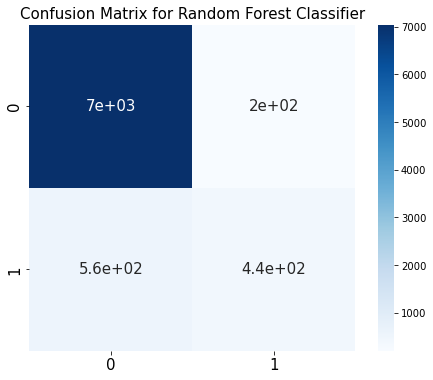

In [81]:
#Random forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')


The accuracy of the Logistic Regression is: 90.42243262927894 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7245
           1       0.69      0.37      0.49       993

    accuracy                           0.90      8238
   macro avg       0.80      0.68      0.72      8238
weighted avg       0.89      0.90      0.89      8238



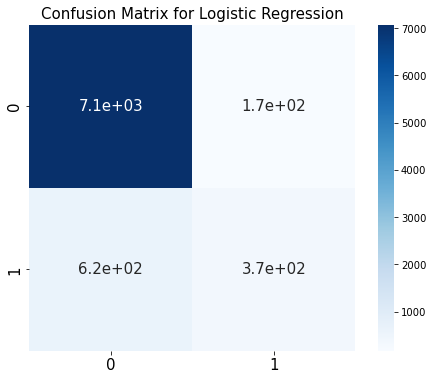

In [82]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
# Predict probabilities
probs_y=lr.predict_proba(x_test)
### Print results 
probs_y = np.round(probs_y, 2)
print('The accuracy of the Logistic Regression is:', lr.score(x_test, y_test) * 100, '%')
generate_results(lr, y_pred, 'Logistic Regression')


Step 6. Select features using RFE and RFECV methods. Explain, how you define the optimal number of features for each of the cases.

In [83]:
#Select from Model + Random Forest Model
from sklearn.feature_selection import SelectFromModel
SFM = SelectFromModel(estimator=RandomForestClassifier())
s=SFM.fit(x, y)
n_features = s.transform(x).shape[1]

n_features



8

In [84]:
feature_idx = s.get_support()
feature_name_rf = x.columns[feature_idx]
feature_name_rf 

Index(['age', 'duration', 'campaign', 'pdays', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'poutcome_success'],
      dtype='object')

In [93]:
# RFE + Random Forest 
from sklearn.feature_selection import RFE
rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = None, step = 1)
F=rfe_selector.fit(x, y)
x.columns[F.get_support()]
print("Num Features: %s" % (F.n_features_))
print("Selected Features: %s" % (F.support_))
print("Feature Ranking: %s" % (F.ranking_))


Num Features: 30
Selected Features: [ True  True  True  True  True  True  True  True  True  True False False
 False False False False False  True False False False  True  True False
 False False  True  True False  True  True False  True False False  True
 False  True  True False  True  True False False False False False False
 False False False False False  True  True  True  True  True False  True
  True]
Feature Ranking: [ 1  1  1  1  1  1  1  1  1  1 19 24  4 12 18  8 15  1 20 28  3  1  1 30
  6 17  1  1 31  1  1 13  1 14 32  1 27  1  1 26  1  1  9 16 23 29 21  7
 10 11 25  2 22  1  1  1  1  1  5  1  1]


In [94]:
features_rfe =x.columns[rfe_selector.support_]
features_rfe 

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'job_admin.', 'job_blue-collar',
       'job_technician', 'marital_married', 'marital_single',
       'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'default_no', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [95]:
# RFE + logistic regression
rfe_selector2 = RFE(estimator=LogisticRegression(),n_features_to_select = None, step = 1)
R=rfe_selector2.fit(x, y)
x.columns[R.get_support()]
print("Num Features: %s" % (R.n_features_))
print("Selected Features: %s" % (R.support_))
print("Feature Ranking: %s" % (R.ranking_))

Num Features: 30
Selected Features: [False  True  True  True False  True  True  True False  True  True False
 False  True False  True  True False False False False False False False
 False False  True False False False  True False  True  True  True False
 False False False False False  True  True False  True False  True  True
  True  True False  True False False  True False  True  True  True  True
  True]
Feature Ranking: [14  1  1  1  8  1  1  1 12  1  1 27 28  1  4  1  1 18 16 19 11 10 13 32
  2 23  1  3  9 25  1 15  1  1  1 30 26 31  5 22 21  1  1 24  1  6  1  1
  1  1  7  1 20 17  1 29  1  1  1  1  1]


In [96]:
features_rfe2 =x.columns[rfe_selector2.support_]
features_rfe2

Index(['duration', 'campaign', 'pdays', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'job_blue-collar', 'job_entrepreneur', 'job_retired',
       'job_services', 'job_student', 'education_basic.9y',
       'education_university.degree', 'default_no', 'default_unknown',
       'default_yes', 'contact_cellular', 'contact_telephone', 'month_aug',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_oct',
       'day_of_week_mon', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

Step 7. Apply the RandomForestClassifier and LogisticRegression model with default parameters to your data (you will have 4 models, taking into account two sets of features that you got). What is the accuracy for your models?


In [86]:
from sklearn.feature_selection import RFECV
# RFECV + Random Forest 

rfecv = RFECV(
    estimator=RandomForestClassifier(),
    min_features_to_select=9,
    step=5,
    n_jobs=-1,
    verbose=1,
    scoring="r2",
    cv=5,
)

F2= rfecv.fit(x, y)

Fitting estimator with 61 features.
Fitting estimator with 56 features.
Fitting estimator with 51 features.
Fitting estimator with 46 features.
Fitting estimator with 41 features.
Fitting estimator with 36 features.
Fitting estimator with 31 features.
Fitting estimator with 26 features.


In [87]:
x.columns[rfecv.support_]

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'job_admin.', 'job_technician',
       'marital_married', 'marital_single', 'education_high.school',
       'education_university.degree', 'housing_no', 'housing_yes',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_success'],
      dtype='object')

In [88]:
from sklearn.feature_selection import RFECV
# RFECV + LOGISTIC REGRESSION

rfecv = RFECV(estimator=LogisticRegression(),
    min_features_to_select=9,
    step=5,
    n_jobs=-1,
    verbose=1,
    scoring="r2",
    cv=5,
)

m= rfecv.fit(x, y)
features_rfecv = x.columns[rfecv.support_]

Fitting estimator with 61 features.
Fitting estimator with 56 features.
Fitting estimator with 51 features.
Fitting estimator with 46 features.
Fitting estimator with 41 features.
Fitting estimator with 36 features.
Fitting estimator with 31 features.
Fitting estimator with 26 features.
Fitting estimator with 21 features.


In [89]:
features_rfecv

Index(['duration', 'campaign', 'pdays', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'job_blue-collar', 'contact_cellular', 'contact_telephone',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'day_of_week_mon',
       'poutcome_failure', 'poutcome_success'],
      dtype='object')










Step 8. Please make the conclusion about the utility of the feature selection